# WeatherPy API Analysis -- HW6
----
Yamini Sasidhar, T/Th Class (RUTSOM201807DATA5)

In [1]:
# Dependencies and Setup
from time import gmtime, strftime
import matplotlib.pyplot as plt
import openweathermapy as owm
import pandas as pd
import numpy as np
import requests
import json
import os

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join('output','cities.csv')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# Also find the correlating country code from citipy docs
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    # Also append the correlating country code to separate list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        
# Print both counts to confirm sufficient count
print(f'cities: {len(cities)}')
print(f'countries : {len(countries)}')

cities: 601
countries : 601


In [3]:
# start off using a temporary list with fewer cities
# search more likely successful if including country code
smaller_list = [cities[i] + ',' + countries[i] for i, city in enumerate(cities[0:8])]
print(smaller_list)

['igarka,ru', 'kavieng,pg', 'krasnovishersk,ru', 'klaksvik,fo', 'rikitea,pf', 'bluff,nz', 'taolanaro,mg', 'lyubokhna,ru']


In [4]:
# here's the full list with country codes
full_list = [cities[i] + ',' + countries[i] for i, city in enumerate(cities)]

### Perform API Calls

In [5]:
# prelim code for set increments, just brainstorming order
counter = 1
x = 1
for i in range(0,100):
#     print(f'record {counter} for set {x}')    
    counter = counter + 1
    if counter > 50:
        x = x + 1
        counter = 1

In [6]:
print('Beginning Data Retrieval')
print('-----------------------------')

base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'units=imperial'
weather_check = []
counter = 1
x = 1

for city in full_list:
    url = base_url + units + '&appid=' + api_key + '&q=' + city
    try:
        response = requests.get(url).json()
        # temp = response['main']['temp']        # original from weather check
        
        # capture all weather data in variables
        city = response['name']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = int(response['dt'])               # unix timestamp
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        
        # append weather data variables to dictionary
        weather_check.append({'city':city,
                              'cloudiness':cloudiness,
                              'country':country,
                              'date':date,
                              'humidity':humidity,
                              'lat':lat,
                              'lng':lng,
                              'max_temp':max_temp,
                              'wind_speed':wind_speed})
        
        # confirm record is found with process statement
        print(f"Processing record {counter} of Set {x} | {city}")
            
    except:
        # confirm record is missing with skip statement
        print('City not found. Skipping...')
        
    # increment counter for incrementing sets
    counter = counter + 1
    if counter > 50:
        x = x + 1
        counter = 1

print('-----------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
-----------------------------
Processing record 1 of Set 1 | Igarka
Processing record 2 of Set 1 | Kavieng
Processing record 3 of Set 1 | Krasnovishersk
Processing record 4 of Set 1 | Klaksvik
Processing record 5 of Set 1 | Rikitea
Processing record 6 of Set 1 | Bluff
City not found. Skipping...
Processing record 8 of Set 1 | Lyubokhna
Processing record 9 of Set 1 | Ilulissat
Processing record 10 of Set 1 | Guerrero Negro
Processing record 11 of Set 1 | Tuktoyaktuk
Processing record 12 of Set 1 | Avarua
Processing record 13 of Set 1 | Namibe
Processing record 14 of Set 1 | Hovd
Processing record 15 of Set 1 | Cabo San Lucas
Processing record 16 of Set 1 | Mar del Plata
Processing record 17 of Set 1 | Vila Franca do Campo
City not found. Skipping...
City not found. Skipping...
Processing record 20 of Set 1 | Necochea
Processing record 21 of Set 1 | Galle
Processing record 22 of Set 1 | Cherskiy
Processing record 23 of Set 1 | Tortoli
Processing record 24 of Set 

Processing record 7 of Set 5 | Praia
Processing record 8 of Set 5 | Nichinan
Processing record 9 of Set 5 | Makakilo City
Processing record 10 of Set 5 | Amapa
Processing record 11 of Set 5 | Chateauroux
Processing record 12 of Set 5 | Okahandja
Processing record 13 of Set 5 | San Cristobal
Processing record 14 of Set 5 | Esperance
Processing record 15 of Set 5 | Chuguyevka
Processing record 16 of Set 5 | Tura
Processing record 17 of Set 5 | Grand Gaube
Processing record 18 of Set 5 | Campo Maior
Processing record 19 of Set 5 | Eyl
Processing record 20 of Set 5 | Homer
Processing record 21 of Set 5 | East London
Processing record 22 of Set 5 | Camopi
Processing record 23 of Set 5 | Norman Wells
Processing record 24 of Set 5 | Saint-Francois
City not found. Skipping...
Processing record 26 of Set 5 | Minab
City not found. Skipping...
Processing record 28 of Set 5 | Peabiru
Processing record 29 of Set 5 | Thompson
Processing record 30 of Set 5 | Felipe Carrillo Puerto
Processing record 3

Processing record 16 of Set 9 | Brae
Processing record 17 of Set 9 | Kupang
Processing record 18 of Set 9 | Bilibino
Processing record 19 of Set 9 | Lubao
Processing record 20 of Set 9 | Beloha
Processing record 21 of Set 9 | Kahului
Processing record 22 of Set 9 | Saiha
Processing record 23 of Set 9 | Nyahururu
Processing record 24 of Set 9 | Varnavino
Processing record 25 of Set 9 | Sterling
City not found. Skipping...
Processing record 27 of Set 9 | Leh
Processing record 28 of Set 9 | Batticaloa
Processing record 29 of Set 9 | Boyolangu
Processing record 30 of Set 9 | Omboue
Processing record 31 of Set 9 | Cartagena del Chaira
Processing record 32 of Set 9 | Drayton Valley
Processing record 33 of Set 9 | San Roque
Processing record 34 of Set 9 | Santa Vitoria do Palmar
Processing record 35 of Set 9 | Erzin
City not found. Skipping...
Processing record 37 of Set 9 | Kewanee
City not found. Skipping...
Processing record 39 of Set 9 | Alyangula
Processing record 40 of Set 9 | Cairns
Pr

In [7]:
# display weather data dictionary
# print(json.dumps(weather_check,indent=4,sort_keys=True))

### Convert Raw Data to DataFrame

In [8]:
# load into dataframe
df = pd.DataFrame(weather_check)

# write csv without index, prepends comma otherwise
df.to_csv(output_data_file,index=False)

# display dataframe
df.head()

,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
0,Igarka,20,RU,1538155532,87,67.47,86.57,51.14,18.68
1,Kavieng,0,PG,1538155532,100,-2.57,150.80,83.36,11.52
2,Krasnovishersk,88,RU,1538155532,97,60.40,57.08,41.06,10.63
3,Klaksvik,92,FO,1538153400,93,62.23,-6.59,46.40,19.46
4,Rikitea,24,PF,1538155533,100,-23.12,-134.97,72.02,2.24


### Plotting the Data

In [9]:
# grab current date of analysis for plot titles
date = strftime('%m/%d/%y', gmtime())

#### Latitude vs. Temperature Plot

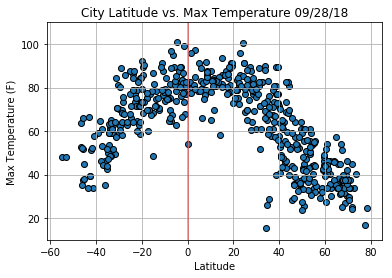

In [10]:
df.plot.scatter('lat','max_temp',s=36,edgecolors='black',figsize=(6,4))
plt.title(f'City Latitude vs. Max Temperature {date}')
plt.vlines(0,-50,150,alpha=0.5,color='r')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylim(10,110)
plt.grid()

plt.savefig(os.path.join('output','lat_vs_temp.png'))

#### Latitude vs. Humidity Plot

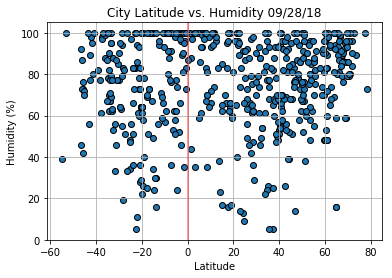

In [11]:
df.plot.scatter('lat','humidity',s=36,edgecolors='black',figsize=(6,4))
plt.title(f'City Latitude vs. Humidity {date}')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.vlines(0,-50,150,alpha=0.5,color='r')
plt.ylim(0,105)

plt.savefig(os.path.join('output','lat_vs_humid.png'))

#### Latitude vs. Cloudiness Plot

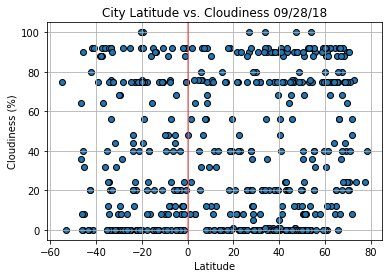

In [12]:
df.plot.scatter('lat','cloudiness',s=36,edgecolors='black',figsize=(6,4))
plt.title(f'City Latitude vs. Cloudiness {date}')
plt.vlines(0,-50,150,alpha=0.5,color='r')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylim(-5,105)
plt.grid()

plt.savefig(os.path.join('output','lat_vs_cloud.png'))

#### Latitude vs. Wind Speed Plot

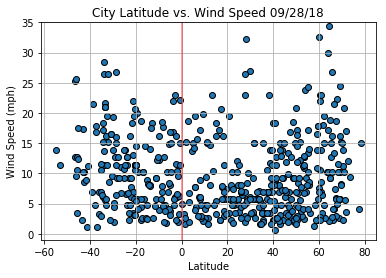

In [13]:
df.plot.scatter('lat','wind_speed',s=36,edgecolors='black',figsize=(6,4))
plt.title(f'City Latitude vs. Wind Speed {date}')
plt.vlines(0,-50,150,alpha=0.5,color='r')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylim(-1,35)
plt.grid()

plt.savefig(os.path.join('output','lat_vs_wind.png'))